<a href="https://colab.research.google.com/github/pelinbalci/TF_Intro/blob/main/lecture_2_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: 

https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab3-What-Are-Convolutions.ipynb#scrollTo=tJTHvE8Qe5nM

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

https://cs231n.github.io/convolutional-networks/

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D


Pixel values * filter values:

$Pixel Values =
 \begin{pmatrix}
  0 & 64 & 128  \\
  48 & 192 & 144 \\
  142 & 226 & 168
 \end{pmatrix}$

 $Filter Values =
 \begin{pmatrix}
  -1 & 0 & -2  \\
  .5 & 4.5 & -1.5 \\
  1.5 & 2 & -3
 \end{pmatrix}$


Current pixel = 192


New Pixel =  0 * -1 + 64 * 0 + 128 * -2 + ... 

the model needs to learn different filters. if you have 2 filters (one horizontal one vertical) you need to update the weights in these filters. If you have 100 filters for one layer you need to learn(update) them all. Pooling is the ey here. You can squeze the image and take only important information by pooling. It reduces the amount of info you need to learn. 

# Basic Convolution

a basic convolution on a 2D Grey Scale image.

we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

In [2]:
i.dtype

dtype('int64')

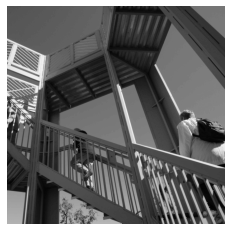

In [3]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [4]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

print(size_x, size_y)

512 512


If all the digits in the filter don't add up to 0 or 1, you should probably do a weight to get it to do so 

so, for example, if your weights are 1,1,1 1,2,1 1,1,1 They add up to 10, so you would set a weight of .1 if you want to normalize them

In [5]:
def calculate_filter_pixel(filter, weight, size_x, size_y):
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        i_transformed[x, y] = convolution
  return i_transformed

def plot_filtered_image(i_transformed):
  # Plot the image. Note the size of the axes -- they are 512 by 512
  plt.gray()
  plt.grid(False)
  plt.imshow(i_transformed)
  #plt.axis('off')
  plt.show()   

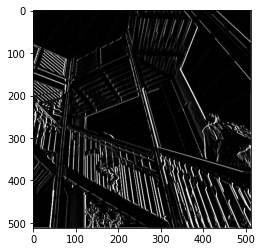

In [6]:
# this gives us horizontal lines. one row is zero
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

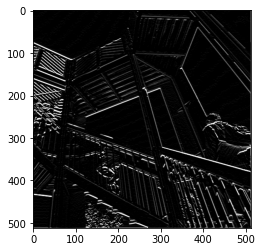

In [7]:
# this gives us vertical lines. one column is zero. 
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

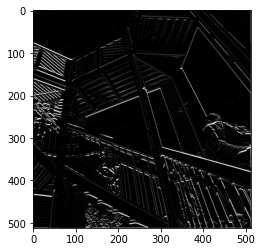

In [8]:
# trial
filter = [ [-1, 1, 0], [-2, 0, 2], [0, -1, 1]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

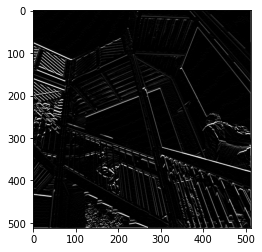

In [9]:
# trial
filter = [ [0, 0, 0], [-2, 0, 2], [-1, 1, 0]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

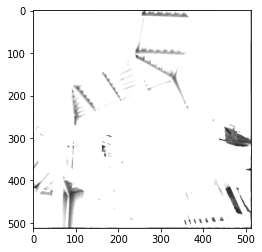

In [10]:
filter = [ [1, 1, 1], [2, 0, 2], [2, 0, 1]] # the sum is not 1
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

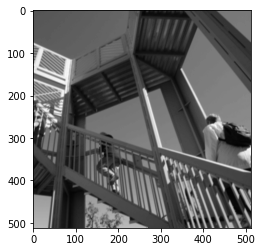

In [11]:
filter = [ [1, 1, 1], [2, 0, 2], [2, 0, 1]] # the sum is not 1
weight = 0.1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

# no transformation at all. 

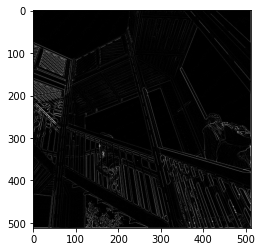

In [12]:
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

Pooling

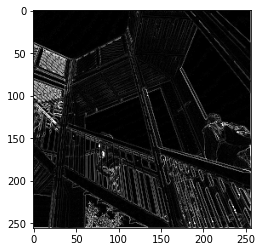

256 256


In [13]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    

size_x_new = newImage.shape[0]
size_y_new = newImage.shape[1]

print(size_x_new, size_y_new)

## Convolutions

tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)

**cs231n:**

We can compute the spatial size of the output volume as a function of 

- the input volume size (W), 
- the receptive field size of the Conv Layer neurons (F), 
- the stride with which they are applied (S), 
- and the amount of zero padding used (P) on the border.

 You can convince yourself that the correct formula for calculating how many neurons “fit” is given by (W−F+2P)/S+1. For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output. 

In [14]:
# https://github.com/tensorflow/tensorflow/blob/a4dfb8d1a71385bd6d122e4f27f86dcebb96712d/tensorflow/python/keras/utils/conv_utils.py#L89

def conv_output_length(input_length, filter_size, padding, stride, dilation=1):
  """Determines output length of a convolution given input length.
  Args:
      input_length: integer.
      filter_size: integer.
      padding: one of "same", "valid", "full", "causal"
      stride: integer.
      dilation: dilation rate, integer.
  Returns:
      The output length (integer).
  """
  if input_length is None:
    return None
  assert padding in {'same', 'valid', 'full', 'causal'}
  dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)
  if padding in ['same', 'causal']:
    output_length = input_length
  elif padding == 'valid':
    output_length = input_length - dilated_filter_size + 1
  elif padding == 'full':
    output_length = input_length + dilated_filter_size - 1
  return (output_length + stride - 1) // stride


def conv_input_length(output_length, filter_size, padding, stride):
  """Determines input length of a convolution given output length.
  Args:
      output_length: integer.
      filter_size: integer.
      padding: one of "same", "valid", "full".
      stride: integer.
  Returns:
      The input length (integer).
  """
  if output_length is None:
    return None
  assert padding in {'same', 'valid', 'full'}
  if padding == 'same':
    pad = filter_size // 2
  elif padding == 'valid':
    pad = 0
  elif padding == 'full':
    pad = filter_size - 1
  return (output_length - 1) * stride - 2 * pad + filter_size

In [15]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
import tensorflow as tf
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x)
# = tf.keras.layers.Conv2D(filters, kernelsize, activation='relu', input_shape=28,28,3)(x)
print(y.shape)


(4, 26, 26, 2)


In [16]:
# output_length = input_length - dilated_filter_size + 1
# (output_length + stride - 1) // stride

output = 28 - 3 +1  # 26
final = 26 + 1-1 // 1


In [17]:
input_length, filter_size, padding, stride, dilation = 28, 3, 'valid', 1, 1
output = conv_output_length(input_length, filter_size, padding, stride, dilation)
print(output)

26


In [18]:
(28 - 3 + 2*0) / 1  + 1

26.0

cs231n:

"Dilated convolutions:

A recent development (e.g. see paper by Fisher Yu and Vladlen Koltun) is to introduce one more hyperparameter to the CONV layer called the dilation. So far we’ve only discussed CONV filters that are contiguous. However, it’s possible to have filters that have spaces between each cell, called dilation. 

As an example, in one dimension a filter w of size 3 would compute over input x the following: 

w[0]*x[0] + w[1]*x[1] + w[2]*x[2]. This is dilation of 0. 

For dilation 1 the filter would instead compute:

w[0]*x[0] + w[1]*x[2] + w[2]*x[4]; 

In other words there is a gap of 1 between the applications. This can be very useful in some settings to use in conjunction with 0-dilated filters because it allows you to merge spatial information across the inputs much more agressively with fewer layers. For example, if you stack two 3x3 CONV layers on top of each other then you can convince yourself that the neurons on the 2nd layer are a function of a 5x5 patch of the input (we would say that the effective receptive field of these neurons is 5x5). If we use dilated convolutions then this effective receptive field would grow much quicker."

In [19]:
# With `dilation_rate` as 2.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', dilation_rate=2, input_shape=input_shape[1:])(x)
print(y.shape)


(4, 24, 24, 2)


In [20]:
# dilated_filter_size = filter_size + (filter_size - 1) * (dilation - 1)
# output_length = input_length - dilated_filter_size + 1  (since padding is default 'valid')
# (output_length + stride - 1) // stride

dilated_filter_size = 3 + (3 - 1) * (2 - 1)
print(dilated_filter_size)   # 5

output_length = 28 - dilated_filter_size + 1
print(output_length)

final = (output_length + 1 - 1) // 1
print(final)

5
24
24


In [21]:
# With `padding` as "same".
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(
2, 3, activation='relu', padding="same", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 28, 28, 2)


In [22]:
# output_length = input_length
# (output_length + stride - 1) // stride

output = 28
final = 28 + 1-1 // 1

In [23]:
# With extended batch shape [4, 7]:
input_shape = (4, 7, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[2:])(x)
print(y.shape)

(4, 7, 26, 26, 2)


28 - 3 +1 = 26

26 +1 -1 // 1 = 26

Ref: https://lodev.org/cgtutor/filtering.html

There are a few rules about the filter:
- Its size has to be uneven, so that it has a center, for example 3x3, 5x5 and 7x7 are ok.
- It doesn't have to, but the sum of all elements of the filter should be 1 if you want the resulting image to have the same brightness as the original.
- If the sum of the elements is larger than 1, the result will be a brighter image.
- if it's smaller than 1, a darker image. 
- If the sum is 0, the resulting image isn't necessarily completely black, but it'll be very dark.



In the Fourier Domain or Frequency Domain, the convolution operation becomes a multiplication instead, which is faster. In the Fourier Domain, much more powerful and bigger filters can be applied faster, especially if you use the Fast Fourier Transform. More about this is in the Fourier Transform article. In this article, we'll look at a few very typical small filters, such as blur, edge detection and emboss.

In [25]:
def prepare_for_filter(image_source):
  image_filtered = np.copy(image_source)
  size_x = image_filtered.shape[0]
  size_y = image_filtered.shape[1]
  print(size_x, size_y)
  return image_filtered, size_x, size_y

def calculate_filter_pixel(image_source, image_filtered, filter, weight, size_x, size_y):
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (image_source[x - 1, y-1] * filter[0][0])
        convolution = convolution + (image_source[x, y-1] * filter[0][1])
        convolution = convolution + (image_source[x + 1, y-1] * filter[0][2])
        convolution = convolution + (image_source[x-1, y] * filter[1][0])
        convolution = convolution + (image_source[x, y] * filter[1][1])
        convolution = convolution + (image_source[x+1, y] * filter[1][2])
        convolution = convolution + (image_source[x-1, y+1] * filter[2][0])
        convolution = convolution + (image_source[x, y+1] * filter[2][1])
        convolution = convolution + (image_source[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        image_filtered[x, y] = convolution
  return image_filtered

def plot_filtered_image(image_filtered):
  # Plot the image. Note the size of the axes -- they are 512 by 512
  plt.gray()
  plt.grid(False)
  plt.imshow(image_filtered)
  #plt.axis('off')
  plt.show()   

Saving horse3.jpg to horse3 (5).jpg
/content/horse3.jpg


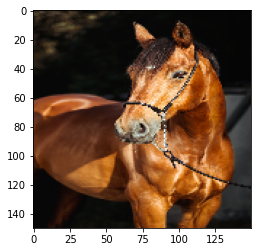

In [80]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
 
for fn in uploaded.keys():
  path = '/content/' + fn
  print(path)
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
# plot_filtered_image(img) # same

150 150


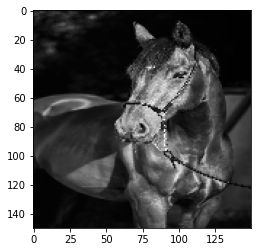

In [51]:
# Turn to grayscale and prepare data:

img_np = np.copy(img)
gray_image = img_np.dot([0.07, 0.72, 0.21])
plt.imshow(gray_image)

image_filtered, size_x, size_y = prepare_for_filter(gray_image)

150 150


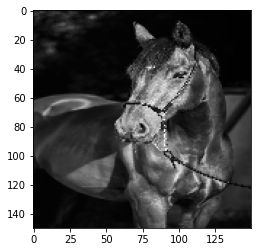

In [52]:
# If you want to resize:
from PIL import Image

old_img = Image.fromarray(gray_image)
plt.imshow(old_img)

new_img = old_img.resize((150, 150))
new_img_np = np.array(new_img)
plt.imshow(new_img_np)

image_filtered, size_x, size_y = prepare_for_filter(new_img_np)

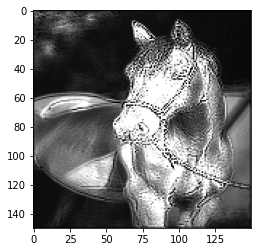

In [53]:
# shiny! sum >1
filter = [ [0, 1, 0], [1, -4, 1], [1, 1, 1]]
weight = 1
image_filtered = calculate_filter_pixel(gray_image, image_filtered, filter, weight, size_x, size_y)
plot_filtered_image(image_filtered)

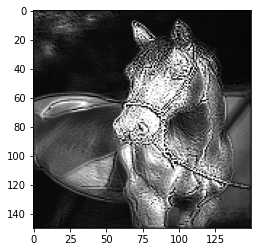

In [55]:
# darker! sum <1
filter = [ [0, 1, 0], [1, -4, 1], [1, 1, 0.5]]
weight = 1
image_filtered = calculate_filter_pixel(gray_image, image_filtered, filter, weight, size_x, size_y)
plot_filtered_image(image_filtered)

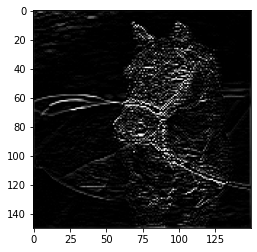

In [56]:
# dark. sum is 0 horizontal lines. 
filter = [[-0.5, 1, -0.5], [0, 0, 0], [-2, 4, -2]]
weight = 1
image_filtered = calculate_filter_pixel(gray_image, image_filtered, filter, weight, size_x, size_y)
plot_filtered_image(image_filtered)

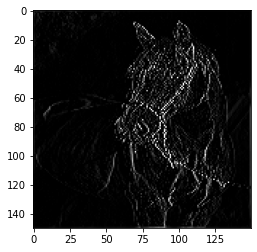

In [57]:
# dark. sum is 0. vertical lines
filter = [[0, -1, 0], [0, 3, 0], [0, -2, 0]]
weight = 1
image_filtered = calculate_filter_pixel(gray_image, image_filtered, filter, weight, size_x, size_y)
plot_filtered_image(image_filtered)

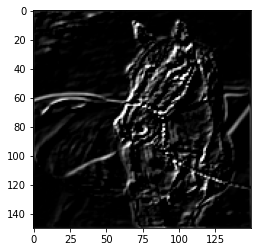

In [58]:
# Note from lodev.org

# An emboss filter gives a 3D shadow effect to the image, the result is very useful 
# for a bumpmap of the image. It can be achieved by taking a pixel on one side of the center, 
# and subtracting one of the other side from it. 

# Pixels can get either a positive or a negative result. 

# To use the negative pixels as shadow and positive ones as light, for a bumpmap, 
# a bias of 128 is added to the image. Now, most parts of the image will be gray, 
# and the sides will be either dark gray/black or bright gray/white.


filter = [[-1, -1,  0], [-1,  0,  1], [0,  1,  1]]
weight = 1
image_filtered = calculate_filter_pixel(gray_image, image_filtered, filter, weight, size_x, size_y)
plot_filtered_image(image_filtered)

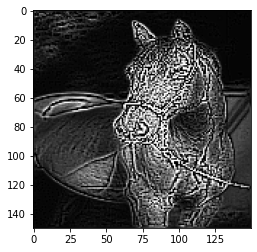

In [59]:
# show edges:
filter = [[1, 1,  1], [1,  -7,  1], [1,  1,  1]]
weight = 1
image_filtered = calculate_filter_pixel(gray_image, image_filtered, filter, weight, size_x, size_y)
plot_filtered_image(image_filtered)

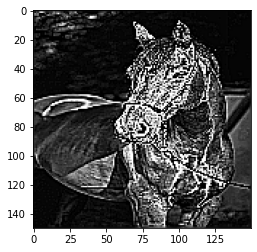

In [60]:
# Note from lodev.org:

# To sharpen the image is very similar to finding edges, add the original image, 
# and the image after the edge detection to each other, and the result will be a 
# new image where the edges are enhanced, making it look sharper. 

# Adding those two images is done by taking the edge detection filter from the 
# previous example, and incrementing the center value of it with 1. Now the sum of the 
# filter elements is 1 and the result will be an image with the same brightness as the original, but sharper.


filter = [[-1, -1, -1],
  [-1,  9, -1],
  [-1, -1, -1]]
weight = 1
image_filtered = calculate_filter_pixel(gray_image, image_filtered, filter, weight, size_x, size_y)
plot_filtered_image(image_filtered)